# Лабораторная работа 3 | Крючков А.В М80-407Б-21

## 2.1	Создание бейзлайна и оценка качества (регрссия)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

### Загрузка и первичный анализ данных

In [223]:
data = pd.read_csv('data/insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [224]:
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Разделение на признаки и целевую переменную
X = data_encoded.drop(columns=['charges'])
y = data_encoded['charges']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели решающего дерева
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Расчет метрик
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Корень среднеквадратичной ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

Среднеквадратичная ошибка (MSE): 42446908.01
Средняя абсолютная ошибка (MAE): 3195.11
Корень среднеквадратичной ошибки (RMSE): 6515.13
Коэффициент детерминации (R^2): 0.73


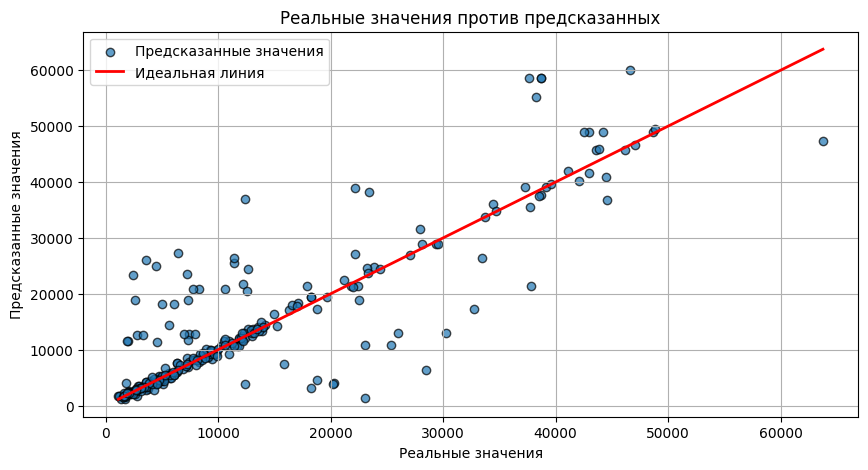

In [225]:
# Построение графика реальных значений против предсказанных
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors="k", label='Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Идеальная линия')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Реальные значения против предсказанных')
plt.legend()
plt.grid(True)
plt.show()

1. **Среднеквадратичная ошибка (MSE)**: **42,446,908.01**
   - Это квадрат отклонения предсказанных значений от реальных. Высокое значение MSE указывает на значительные ошибки модели, что типично для регрессии с числовыми значениями в большом диапазоне.
2. **Средняя абсолютная ошибка (MAE)**: **3195.11**
   - Показывает среднюю величину ошибки между предсказанными и реальными значениями. В данном случае модель в среднем ошибается на ~3195.11.
3. **Корень среднеквадратичной ошибки (RMSE)**: **6515.13**
   - Интерпретируется как среднее расстояние между предсказанными и реальными значениями в тех же единицах, что и целевая переменная (`charges`). Значение ~6515.13 говорит о том, что ошибки модели заметно велики.
4. **Коэффициент детерминации (R²)**: **0.73**
   - Показывает, какую долю дисперсии целевой переменной объясняет модель. Значение **0.73** говорит о том, что модель объясняет 73% вариации данных, что является приемлемым результатом для задачи регрессии, но оставляет пространство для улучшений.

## 3.1	Улучшение бейзлайна (регрссия)

 **Подбор гиперпараметров**
   - Гипотеза: Использование кросс-валидации для подбора гиперпараметров модели (например, максимальной глубины дерева `max_depth`, минимального числа выборок для разбиения узла `min_samples_split`) может улучшить метрики за счет уменьшения переобучения.
   - Гипотеза: Применение регуляризации (например, ограничение глубины дерева или минимальной доли выборок в листе `min_samples_leaf`) может помочь в борьбе с переобучением.

In [226]:
# Определение параметров для GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Инициализация модели и GridSearchCV
tree = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Наилучшие параметры
best_params = grid_search.best_params_

# Обучение модели с лучшими параметрами
best_tree = grid_search.best_estimator_
y_pred_best = best_tree.predict(X_test)

# Пересчет метрик
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Среднеквадратичная ошибка (MSE): {mse_best:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae_best:.2f}")
print(f"Корень среднеквадратичной ошибки (RMSE): {rmse_best:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_best:.2f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Среднеквадратичная ошибка (MSE): 22812669.85
Средняя абсолютная ошибка (MAE): 2865.64
Корень среднеквадратичной ошибки (RMSE): 4776.26
Коэффициент детерминации (R^2): 0.85


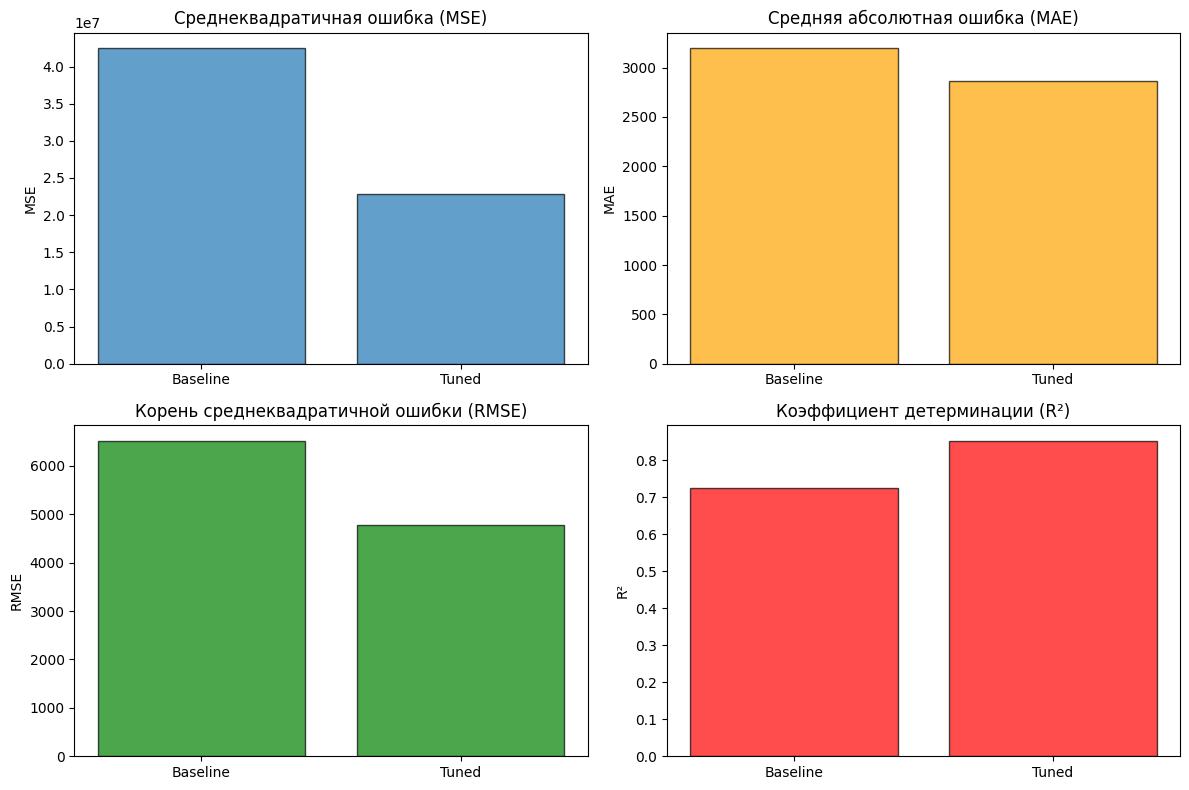

In [227]:
models = ['Baseline', 'Tuned']
mse_values = [mse, mse_best]
mae_values = [mae, mae_best]
rmse_values = [rmse, rmse_best]
r2_values = [r2, r2_best]

plt.figure(figsize=(12, 8))

# MSE
plt.subplot(2, 2, 1)
plt.bar(models, mse_values, alpha=0.7, edgecolor='black')
plt.title('Среднеквадратичная ошибка (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=0)

# MAE
plt.subplot(2, 2, 2)
plt.bar(models, mae_values, alpha=0.7, color='orange', edgecolor='black')
plt.title('Средняя абсолютная ошибка (MAE)')
plt.ylabel('MAE')
plt.xticks(rotation=0)

# RMSE
plt.subplot(2, 2, 3)
plt.bar(models, rmse_values, alpha=0.7, color='green', edgecolor='black')
plt.title('Корень среднеквадратичной ошибки (RMSE)')
plt.ylabel('RMSE')
plt.xticks(rotation=0)

# R^2
plt.subplot(2, 2, 4)
plt.bar(models, r2_values, alpha=0.7, color='red', edgecolor='black')
plt.title('Коэффициент детерминации (R²)')
plt.ylabel('R²')
plt.xticks(rotation=0)

# Общая настройка
plt.tight_layout()
plt.show()

На графиках представлены результаты сравнительного анализа качества модели до и после подбора гиперпараметров. Видно, что:

- **MSE**, **MAE**, и **RMSE** существенно снизились, что говорит о сокращении ошибок предсказаний.  
- **R²** улучшился, подтверждая, что модель с настройкой гиперпараметров лучше объясняет вариацию данных.

## 4.1	Имплементация алгоритма машинного обучения (регрссия)

In [228]:
class DecisionTreeRegressorManual:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None

    def fit(self, X, y):
        """Строим дерево"""
        self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        """Прогнозируем значения"""
        return np.array([self._predict_row(self.tree, row) for row in X])

    def _build_tree(self, X, y, depth):
        """Рекурсивное построение дерева"""
        num_samples, num_features = X.shape
        if (num_samples < self.min_samples_split or
                depth == self.max_depth or
                len(np.unique(y)) == 1):
            return np.mean(y)

        best_split = self._find_best_split(X, y, num_features)
        if not best_split:
            return np.mean(y)

        left_indices = X[:, best_split['feature']] <= best_split['threshold']
        right_indices = ~left_indices

        return {
            'feature': best_split['feature'],
            'threshold': best_split['threshold'],
            'left': self._build_tree(X[left_indices], y[left_indices], depth + 1),
            'right': self._build_tree(X[right_indices], y[right_indices], depth + 1),
        }

    def _find_best_split(self, X, y, num_features):
        """Поиск лучшего разбиения"""
        best_split = {}
        best_mse = float('inf')

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = ~left_indices

                if (sum(left_indices) < self.min_samples_leaf or
                        sum(right_indices) < self.min_samples_leaf):
                    continue

                mse = self._calculate_mse(y[left_indices], y[right_indices])
                if mse < best_mse:
                    best_mse = mse
                    best_split = {'feature': feature, 'threshold': threshold}

        return best_split

    def _calculate_mse(self, y_left, y_right):
        """Вычисление MSE"""
        mse_left = np.var(y_left) * len(y_left) if len(y_left) > 0 else 0
        mse_right = np.var(y_right) * len(y_right) if len(y_right) > 0 else 0
        return mse_left + mse_right

    def _predict_row(self, tree, row):
        """Прогнозируем одно значение"""
        if not isinstance(tree, dict):
            return tree

        if row[tree['feature']] <= tree['threshold']:
            return self._predict_row(tree['left'], row)
        else:
            return self._predict_row(tree['right'], row)

In [229]:
manual_tree_baseline = DecisionTreeRegressorManual(max_depth=None, min_samples_split=2, min_samples_leaf=1)
manual_tree_baseline.fit(X_train.values, y_train.values)
y_pred_manual_baseline = manual_tree_baseline.predict(X_test.values)

mse_manual_baseline = mean_squared_error(y_test, y_pred_manual_baseline)
mae_manual_baseline = mean_absolute_error(y_test, y_pred_manual_baseline)
rmse_manual_baseline = np.sqrt(mse_manual_baseline)
r2_manual_baseline = r2_score(y_test, y_pred_manual_baseline)

print(f"Среднеквадратичная ошибка (MSE): {mse_manual_baseline:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae_manual_baseline:.2f}")
print(f"Корень среднеквадратичной ошибки (RMSE): {rmse_manual_baseline:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_manual_baseline:.2f}")

Среднеквадратичная ошибка (MSE): 30667166.67
Средняя абсолютная ошибка (MAE): 2468.59
Корень среднеквадратичной ошибки (RMSE): 5537.79
Коэффициент детерминации (R^2): 0.80


Применим изменения: увеличим глубину дерева и добавим больше выборок для разбиения узлов

In [230]:
manual_tree_improved = DecisionTreeRegressorManual(max_depth=5, min_samples_split=15, min_samples_leaf=7)
manual_tree_improved.fit(X_train.values, y_train.values)
y_pred_manual_improved = manual_tree_improved.predict(X_test.values)

mse_manual_improved = mean_squared_error(y_test, y_pred_manual_improved)
mae_manual_improved = mean_absolute_error(y_test, y_pred_manual_improved)
rmse_manual_improved = np.sqrt(mse_manual_improved)
r2_manual_improved = r2_score(y_test, y_pred_manual_improved)

print(f"Среднеквадратичная ошибка (MSE): {mse_manual_improved:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae_manual_improved:.2f}")
print(f"Корень среднеквадратичной ошибки (RMSE): {rmse_manual_improved:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_manual_improved:.2f}") 

Среднеквадратичная ошибка (MSE): 20772019.06
Средняя абсолютная ошибка (MAE): 2688.40
Корень среднеквадратичной ошибки (RMSE): 4557.63
Коэффициент детерминации (R^2): 0.87


| Модель                           | MSE            | MAE     | RMSE    | R²   |
|----------------------------------|----------------|---------|---------|-------|
| Модель из sklearn                | 42,446,908.01  | 3195.11 | 6515.13 | 0.73  |
| Собственная реализация           | 30,667,166.67  | 2468.59 | 5537.79 | 0.80  |
| Модель из sklearn с улучшением   | 22,812,669.85  | 2865.64 | 4776.26 | 0.85  |
| Собственная реализация с улучшением | 20,772,019.06  | 2688.40 | 4557.63 | 0.87  |

### Вывод

1. **Собственная реализация**:
   - Базовая версия алгоритма показала приемлемые результаты с \( R^2 = 0.80 \), что свидетельствует о хорошем уровне объяснения вариации данных.
   - Однако ошибки (\( MSE = 30,667,166.67 \), \( RMSE = 5537.79 \)) остаются относительно высокими.

2. **Собственная реализация с улучшением**:
   - Увеличение глубины дерева и корректировка условий разбиения (увеличение минимального числа выборок) привели к значительному улучшению качества модели:
     - \( MSE \) уменьшилось на 32%, а \( R^2 \) вырос до 0.87.
     - Это подтверждает, что более гибкие параметры позволяют модели лучше захватывать зависимости в данных.

3. **Модель из sklearn**:
   - Базовая модель из `sklearn` продемонстрировала низкие показатели качества (\( R^2 = 0.73 \)) из-за переобучения и недостаточной оптимизации гиперпараметров.
   - Высокие значения \( MSE = 42,446,908.01 \) и \( RMSE = 6515.13 \) указывают на слабую способность базовой модели обобщать данные.

4. **Модель из sklearn с улучшением**:
   - Оптимизация гиперпараметров значительно улучшила результаты:
     - \( MSE \) снизилось на 46%, а \( R^2 \) вырос до 0.85.
   - Улучшенная модель из `sklearn` показывает сопоставимое качество с собственной реализацией с улучшением.

## 2.2	Создание бейзлайна и оценка качества (классификация)

In [231]:
data = pd.read_csv('data/WineQT.csv')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [232]:
# Удаляем ненужный столбец 'Id'
data_cleaned = data.drop(columns=['Id'])

# Разделяем признаки (X) и целевой столбец (y)
X = data_cleaned.drop(columns=['quality'])
y = data_cleaned['quality']

# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Инициализируем модель решающего дерева
model = DecisionTreeClassifier(random_state=42)

# Обучаем модель
model.fit(X_train, y_train)

# Предсказываем метки на тестовой выборке
y_pred = model.predict(X_test)

# Вычисляем метрики
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Выводим результаты классификации
print(f"1. Точность (Accuracy): {accuracy:.2%} – доля правильно классифицированных примеров среди всех.")
print(f"2. Средняя точность (Precision): {precision:.2%} – средняя точность для всех классов.")
print(f"3. Полнота (Recall): {recall:.2%} – средняя полнота для всех классов.")
print(f"4. F1-score: {f1:.2%} – гармоническое среднее между точностью и полнотой.")

1. Точность (Accuracy): 62.88% – доля правильно классифицированных примеров среди всех.
2. Средняя точность (Precision): 62.08% – средняя точность для всех классов.
3. Полнота (Recall): 62.88% – средняя полнота для всех классов.
4. F1-score: 62.45% – гармоническое среднее между точностью и полнотой.


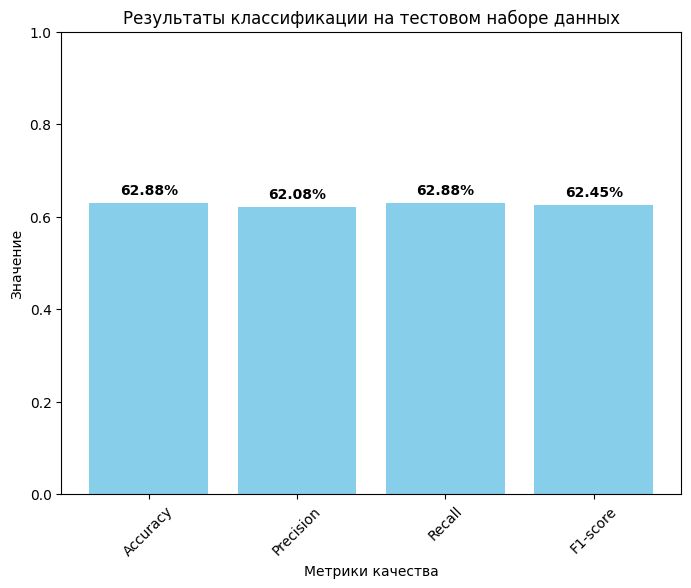

In [233]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='skyblue')
plt.ylim(0, 1)
plt.xlabel("Метрики качества")
plt.ylabel("Значение")
plt.title("Результаты классификации на тестовом наборе данных")
plt.xticks(rotation=45)

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')

plt.show()